# Análisis de datos

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
archivos_recorridos = ['trips_2020.csv', 'trips_2021.csv', 'trips_2022.csv', 'trips_2023.csv', 'trips_2024.csv']

In [19]:
df = pd.read_csv('../data/processed/recorridos/trips_2020.csv', low_memory=False)
filas_genero_nan = df[df['id_estacion_destino'].isna()]
print(filas_genero_nan.iloc[0])

id_recorrido                                  7247132
duracion_recorrido                              10572
fecha_origen_recorrido            2020-01-28 10:58:35
id_estacion_origen                                  3
nombre_estacion_origen                   003 - ADUANA
direccion_estacion_origen     Moreno & Av Paseo Colon
long_estacion_origen                        -58.36826
lat_estacion_origen                        -34.611032
fecha_destino_recorrido           2020-01-28 13:54:47
id_estacion_destino                               NaN
nombre_estacion_destino                           NaN
direccion_estacion_destino                        NaN
long_estacion_destino                             NaN
lat_estacion_destino                              NaN
id_usuario                                     178659
modelo_bicicleta                               ICONIC
genero                                           MALE
Name: 28075, dtype: object


In [16]:
for archivo in archivos_recorridos:
    print(f"\n--- Análisis de NaNs en {archivo} ---")
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', low_memory=False)
    
    nan_por_columna = df.isna().sum()
    
    resumen = pd.DataFrame({
        'NaNs': nan_por_columna,
    })
    
    resumen_filtrado = resumen[resumen['NaNs'] > 0]
    print(resumen_filtrado.sort_values(by='NaNs', ascending=False))


--- Análisis de NaNs en trips_2020.csv ---
                             NaNs
genero                      17155
id_estacion_destino            41
nombre_estacion_destino        41
direccion_estacion_destino     41
long_estacion_destino          41
lat_estacion_destino           41

--- Análisis de NaNs en trips_2021.csv ---
           NaNs
genero  1562106

--- Análisis de NaNs en trips_2022.csv ---
         NaNs
genero  16306

--- Análisis de NaNs en trips_2023.csv ---
                             NaNs
genero                      11966
id_estacion_destino             2
nombre_estacion_destino         2
direccion_estacion_destino      2
long_estacion_destino           2
lat_estacion_destino            2

--- Análisis de NaNs en trips_2024.csv ---
        NaNs
genero  7663


In [18]:
tipos_generos = set()
for archivo in archivos_recorridos:
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=['genero'])
    tipos_generos.update(df['genero'].dropna().unique())

# Mostrar cantidad de géneros distintos y cuáles son
print(f"Cantidad de géneros distintos: {len(tipos_generos)}")
print("Géneros encontrados:", tipos_generos)

/var/folders/27/qwsyx_4n4pjc_cljhqtfcjbh0000gn/T/ipykernel_8085/2073459164.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=['genero'])


Cantidad de géneros distintos: 3
Géneros encontrados: {'FEMALE', 'MALE', 'OTHER'}


In [24]:
ids_estaciones_origen = set()
for archivo in archivos_recorridos:
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=['id_estacion_origen'])
    ids_estaciones_origen.update(df['id_estacion_origen'].dropna().unique())

print(f"Cantidad total de estaciones origen distintas: {len(ids_estaciones_origen)}")
print("IDs de estaciones origen encontradas:", sorted(ids_estaciones_origen))

Cantidad total de estaciones origen distintas: 501
IDs de estaciones origen encontradas: [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 104, 105, 106, 107, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 130, 131, 132, 134, 135, 137, 138, 141, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233

In [26]:
ids_estaciones_destino = set()
for archivo in archivos_recorridos:
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=['id_estacion_destino'])
    ids_estaciones_destino.update(df['id_estacion_destino'].dropna().astype(int).unique())

print(f"Cantidad total de estaciones destino distintas: {len(ids_estaciones_destino)}")
print("IDs de estaciones destino encontradas:", sorted(ids_estaciones_destino))

Cantidad total de estaciones destino distintas: 501
IDs de estaciones destino encontradas: [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 104, 105, 106, 107, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 130, 131, 132, 134, 135, 137, 138, 141, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 2

In [27]:
for archivo in archivos_recorridos:
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=[
        'long_estacion_origen', 'long_estacion_destino', 
        'lat_estacion_origen', 'lat_estacion_destino'
    ])
    
    long_origen_mal = df['long_estacion_origen'].dropna().astype(str).apply(lambda x: not x.startswith('-58'))
    long_destino_mal = df['long_estacion_destino'].dropna().astype(str).apply(lambda x: not x.startswith('-58'))
    lat_origen_mal = df['lat_estacion_origen'].dropna().astype(str).apply(lambda x: not x.startswith('-34'))
    lat_destino_mal = df['lat_estacion_destino'].dropna().astype(str).apply(lambda x: not x.startswith('-34'))
    
    errores = (
        long_origen_mal |
        long_destino_mal |
        lat_origen_mal |
        lat_destino_mal
    )

    print(f"{archivo} → Coordenadas potencialmente fuera del AMBA: {errores.sum()} filas")

trips_2020.csv → Coordenadas potencialmente fuera del AMBA: 0 filas
trips_2021.csv → Coordenadas potencialmente fuera del AMBA: 0 filas
trips_2022.csv → Coordenadas potencialmente fuera del AMBA: 0 filas
trips_2023.csv → Coordenadas potencialmente fuera del AMBA: 0 filas
trips_2024.csv → Coordenadas potencialmente fuera del AMBA: 0 filas


In [28]:
tipos_modelos_bicicletas = set()
for archivo in archivos_recorridos:
    df = pd.read_csv(f'../data/processed/recorridos/{archivo}', usecols=['modelo_bicicleta'])
    tipos_modelos_bicicletas.update(df['modelo_bicicleta'].dropna().unique())

# Mostrar cantidad de géneros distintos y cuáles son
print(f"Cantidad de modelo_bicicleta distintos: {len(tipos_modelos_bicicletas)}")
print("Modelos encontrados:", tipos_modelos_bicicletas)

Cantidad de modelo_bicicleta distintos: 2
Modelos encontrados: {'ICONIC', 'FIT'}


## Gráficos Comparativos

In [31]:
archivos = {
    '2020': '../data/processed/recorridos/trips_2020.csv',
    '2021': '../data/processed/recorridos/trips_2021.csv',
    '2022': '../data/processed/recorridos/trips_2022.csv',
    '2023': '../data/processed/recorridos/trips_2023.csv',
    '2024': '../data/processed/recorridos/trips_2024.csv'
}

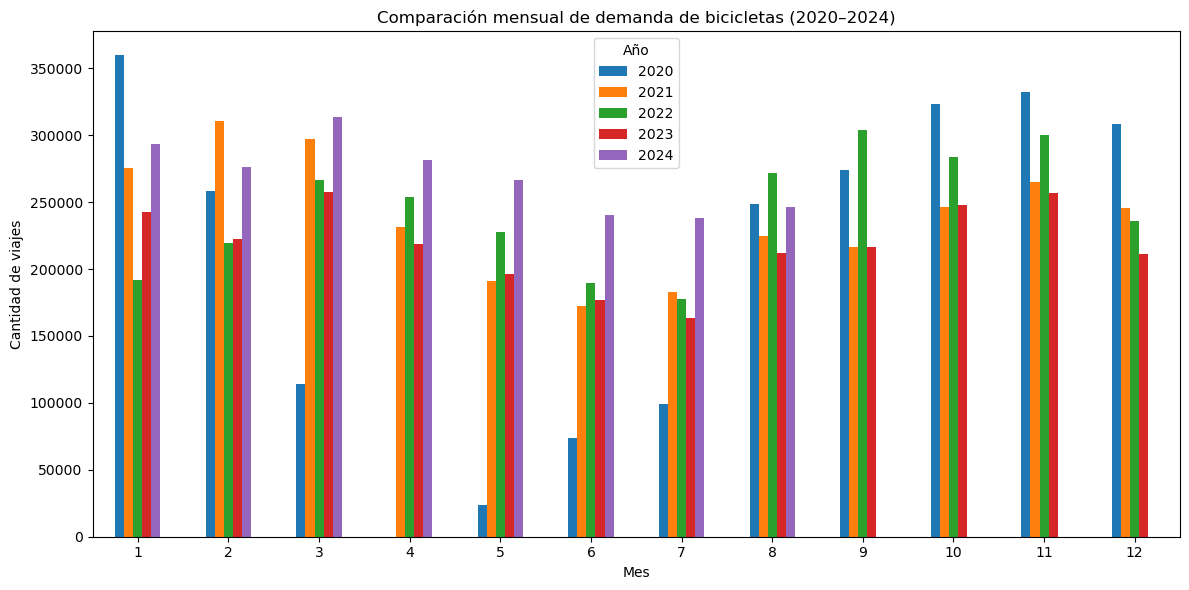

In [29]:
# Diccionario para almacenar la cantidad de viajes por mes
viajes_por_mes = {}

# Procesar cada archivo
for anio, ruta in archivos.items():
    df = pd.read_csv(ruta, usecols=['fecha_origen_recorrido'])
    df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'], errors='coerce')
    df = df.dropna(subset=['fecha_origen_recorrido'])
    df['mes'] = df['fecha_origen_recorrido'].dt.month
    viajes_por_mes[anio] = df.groupby('mes').size()

df_viajes = pd.DataFrame(viajes_por_mes).fillna(0).astype(int).sort_index()

df_viajes.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación mensual de demanda de bicicletas (2020–2024)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

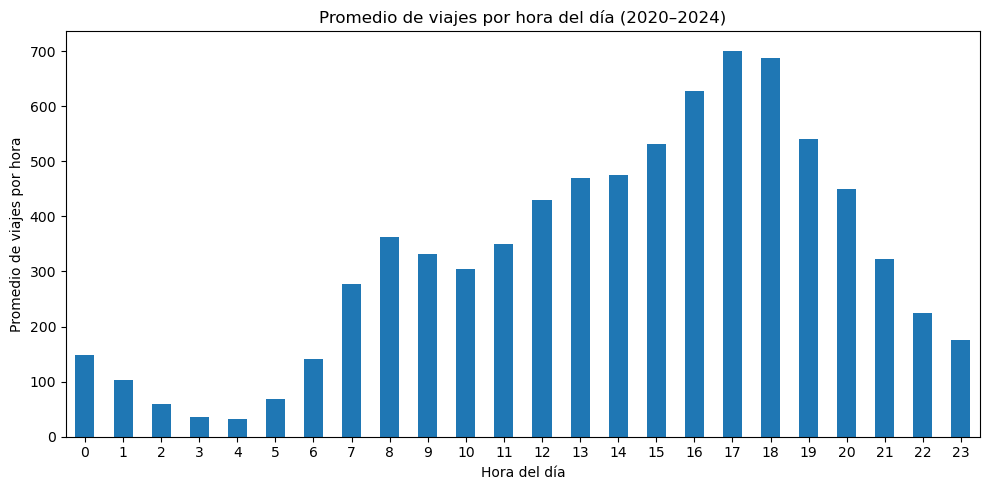

In [32]:
df_todos = pd.DataFrame()

# Leer todos los archivos y extraer hora y fecha
for anio, ruta in archivos.items():
    df = pd.read_csv(ruta, usecols=['fecha_origen_recorrido'])
    df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'], errors='coerce')
    df = df.dropna(subset=['fecha_origen_recorrido'])
    df['fecha'] = df['fecha_origen_recorrido'].dt.date
    df['hora'] = df['fecha_origen_recorrido'].dt.hour
    df_todos = pd.concat([df_todos, df])

# Agrupar por fecha y hora: cuántos viajes hubo en cada hora de cada día
viajes_por_hora_fecha = df_todos.groupby(['fecha', 'hora']).size().reset_index(name='viajes')

# Promediar por hora a lo largo de todos los días
promedio_por_hora = viajes_por_hora_fecha.groupby('hora')['viajes'].mean()

# Graficar
promedio_por_hora.plot(kind='bar', figsize=(10, 5))
plt.title('Promedio de viajes por hora del día (2020–2024)')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de viajes por hora')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

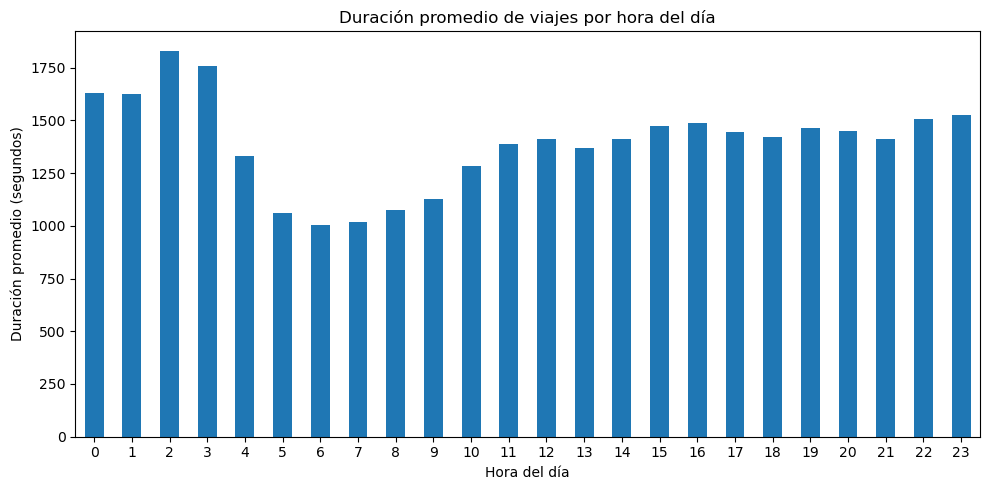

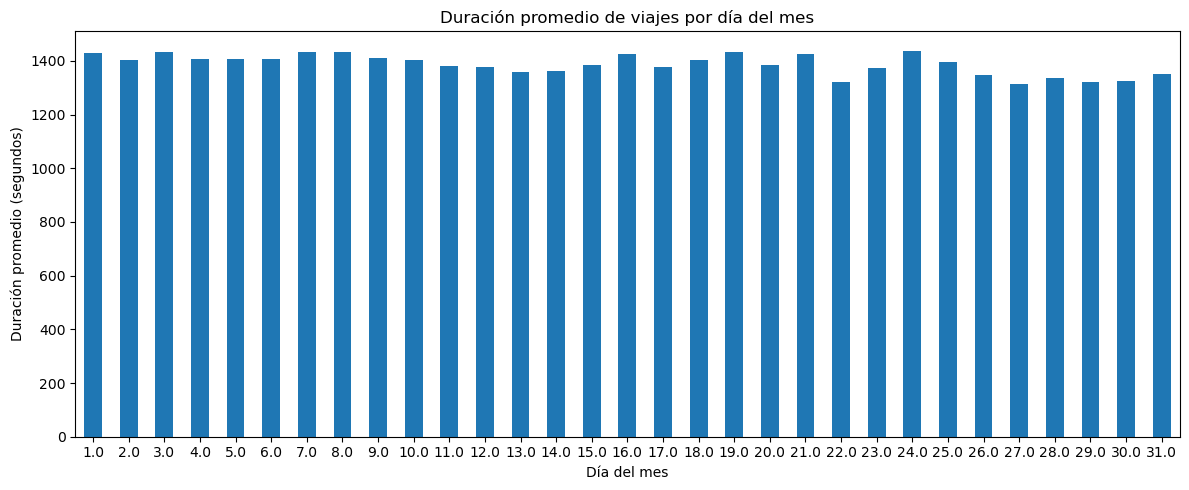

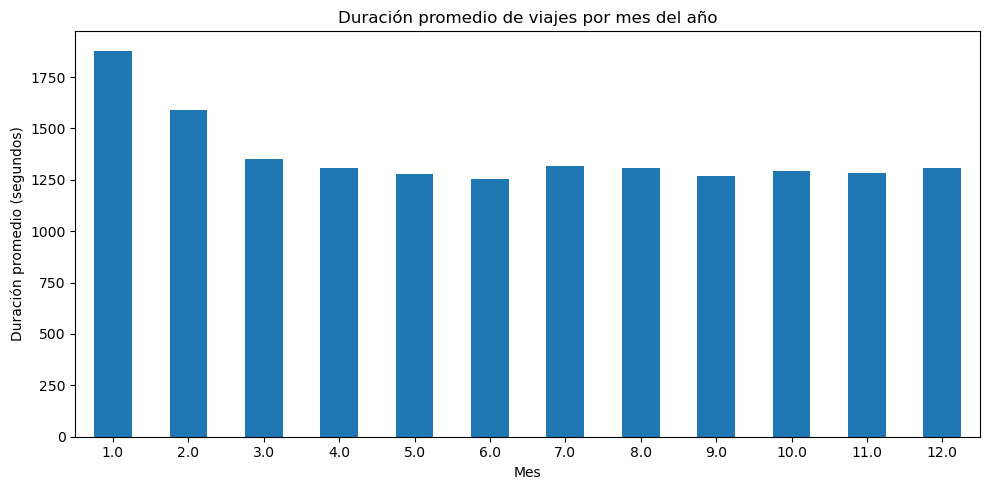

In [33]:
for anio, ruta in archivos.items():
    df = pd.read_csv(ruta, usecols=['fecha_origen_recorrido', 'duracion_recorrido'])
    df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'], errors='coerce')
    df = df.dropna(subset=['fecha_origen_recorrido', 'duracion_recorrido'])
    df = df[df['duracion_recorrido'] > 0]  # filtrar viajes de duración cero o negativa
    df['hora'] = df['fecha_origen_recorrido'].dt.hour
    df['dia'] = df['fecha_origen_recorrido'].dt.day
    df['mes'] = df['fecha_origen_recorrido'].dt.month
    df_todos = pd.concat([df_todos, df])

# ---------- Gráfico 1: duración por hora ----------
df_todos.groupby('hora')['duracion_recorrido'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Duración promedio de viajes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Duración promedio (segundos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------- Gráfico 2: duración por día del mes ----------
df_todos.groupby('dia')['duracion_recorrido'].mean().plot(kind='bar', figsize=(12, 5))
plt.title('Duración promedio de viajes por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Duración promedio (segundos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------- Gráfico 3: duración por mes del año ----------
df_todos.groupby('mes')['duracion_recorrido'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Duración promedio de viajes por mes del año')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (segundos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()